<a href="https://colab.research.google.com/github/9813027032/projects/blob/main/main_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def read_excel():
  df=pd.read_csv(r"drive/MyDrive/Colab Notebooks/energydata_complete.csv")
  df['date']=pd.to_datetime(df['date'])
  df['Hour']=df['date'].dt.hour
  df['minute']=df['date'].dt.minute
  df['month']=df['date'].dt.month
  return df

In [4]:
df=read_excel()
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Hour,minute,month
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,17,0,1
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,17,10,1
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,17,20,1
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,17,30,1
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,17,40,1


In [5]:
print('The number of rows in dataset is - ' , df.shape[0])
print('The number of columns in dataset is - ' , df.shape[1])

The number of rows in dataset is -  19735
The number of columns in dataset is -  32


In [6]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
Hour           0
minute         0
month          0
dtype: int64

In [7]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Hour,minute,month
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,11.502002,24.998733,3.101647
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,6.921953,17.079178,1.339200
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000,0.000000,1.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,6.000000,10.000000,2.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,12.000000,20.000000,3.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,17.000000,40.000000,4.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,23.000000,50.000000,5.000000


In [8]:
# Columns for temperature sensors
temp_cols = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]

# Columns for humidity sensors
RH_cols = ["RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"]

# Columns for weather data
weather_cols = ["T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility"]

# Target variable column
target = ["Appliances"]

In [9]:
df[temp_cols].describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000


In [10]:
df[RH_cols].describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667


In [11]:
df[weather_cols].describe()

,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,7.411665,3.760707,79.750418,755.522602,4.039752,38.330834
std,5.317409,4.194648,14.901088,7.399441,2.451221,11.794719
min,-5.000000,-6.600000,24.000000,729.300000,0.000000,1.000000
25%,3.666667,0.900000,70.333333,750.933333,2.000000,29.000000
50%,6.916667,3.433333,83.666667,756.100000,3.666667,40.000000
75%,10.408333,6.566667,91.666667,760.933333,5.500000,40.000000
max,26.100000,15.500000,100.000000,772.300000,14.000000,66.000000


In [12]:
df[target].describe()

,Appliances
count,19735.000000
mean,97.694958
std,102.524891
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


In [13]:
df['lights'].value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

In [14]:
df.drop(columns=['lights'],axis=1,inplace=True)

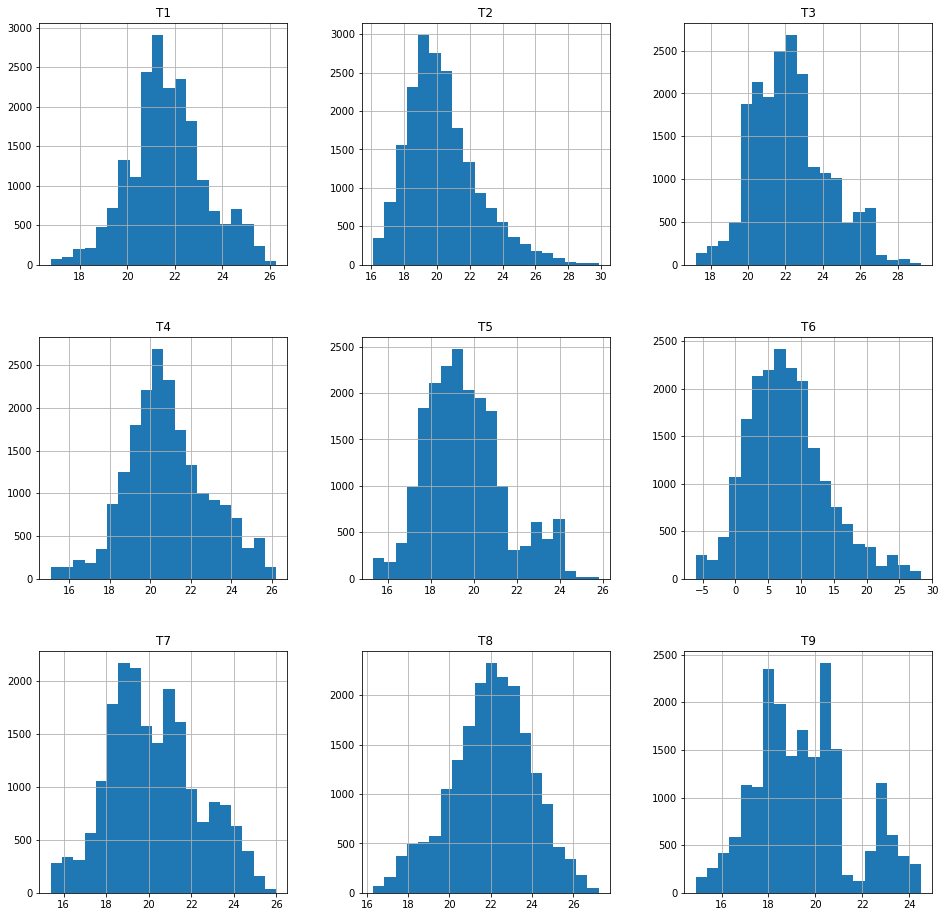

In [15]:
histograms = df[temp_cols].hist(figsize=(16, 16), bins=20)

In [16]:
from scipy.stats import kurtosis
from scipy.stats import skew
print( 'kurtosis of T9 (should be 0): {}'.format( kurtosis(df['T9']) ))
print( 'skewness of T9 (should be 0): {}'.format( skew(df['T9']) ))
print( 'kurtosis of T7 (should be 0): {}'.format( kurtosis(df['T7']) ))
print( 'skewness of T7 (should be 0): {}'.format( skew(df['T7']) ))

kurtosis of T9 (should be 0): -0.3248470583748131
skewness of T9 (should be 0): 0.3826821496468973
kurtosis of T7 (should be 0): -0.46135187526251453
skewness of T7 (should be 0): 0.25470305582303937


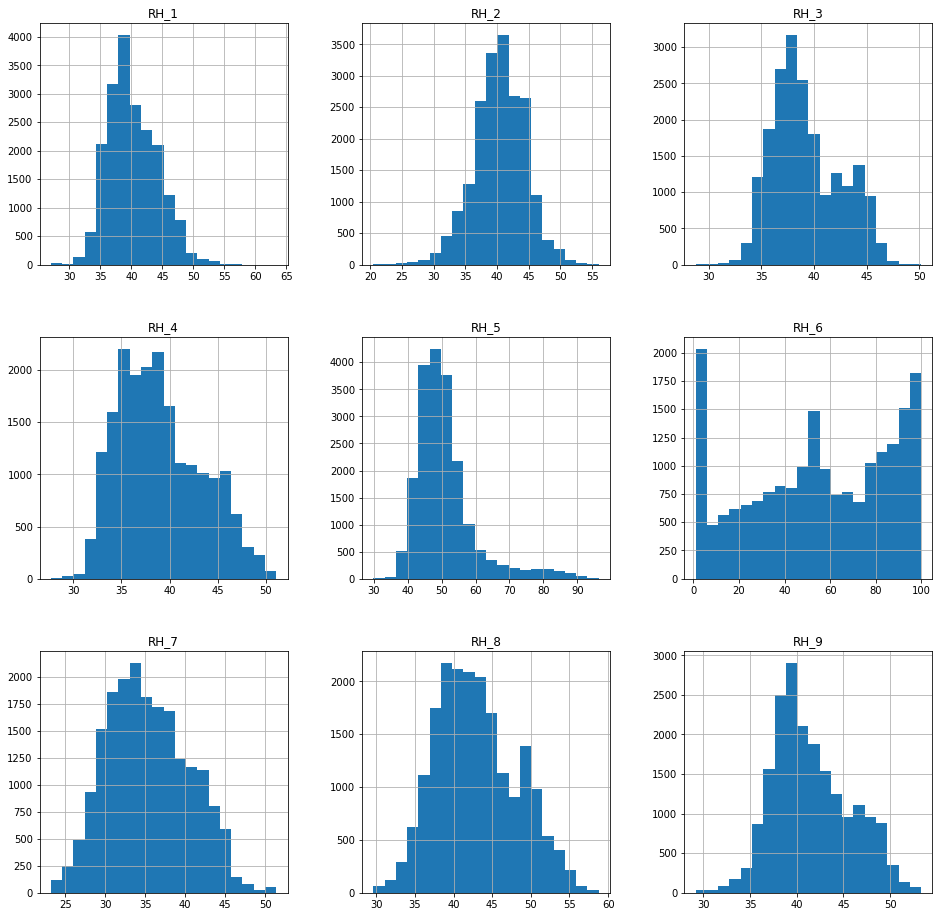

In [17]:
histograms = df[RH_cols].hist(figsize=(16, 16), bins=20)

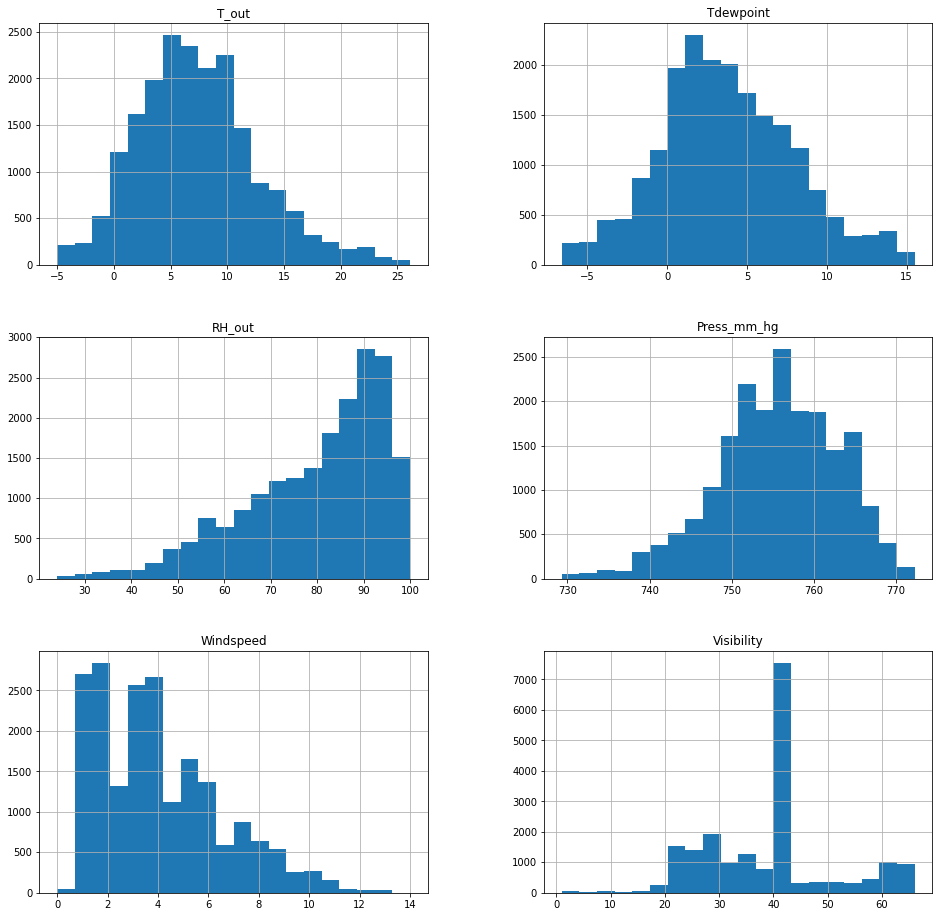

In [18]:
histogram=df[weather_cols].hist(figsize=(16, 16), bins=20)

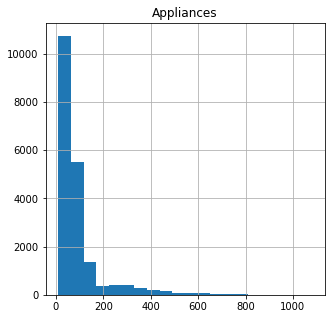

In [19]:
histogram=df[target].hist(figsize=(5, 5), bins=20)

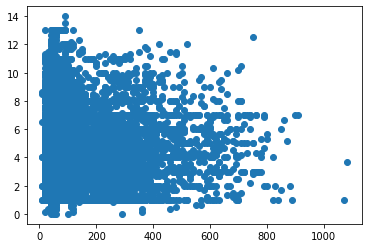

In [20]:
from matplotlib import pyplot
pyplot.scatter(df['Appliances'], df['Windspeed'])
pyplot.show()

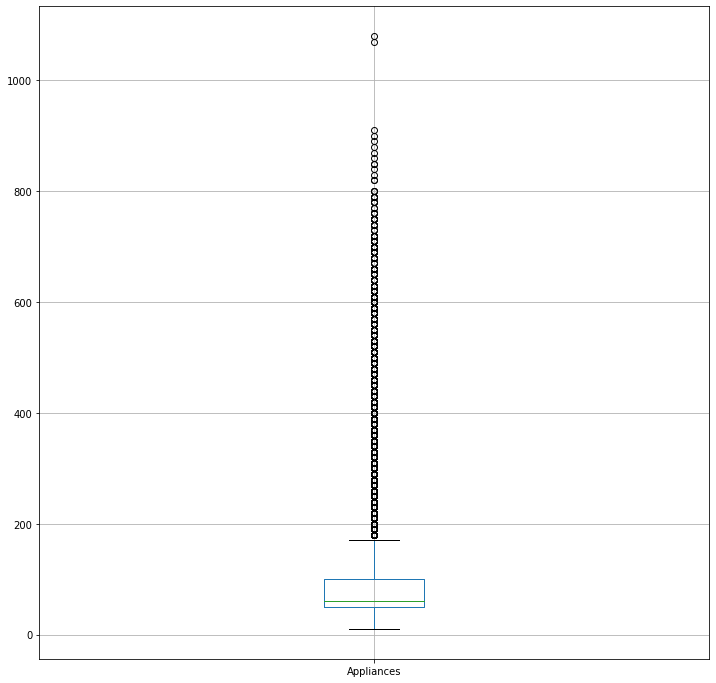

In [21]:
boxplot=df.boxplot(column=['Appliances'],figsize=(12,12))

In [22]:
df

,date,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Hour,minute,month
0,2016-01-11 17:00:00,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,17,0,1
1,2016-01-11 17:10:00,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,17,10,1
2,2016-01-11 17:20:00,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,17,20,1
3,2016-01-11 17:30:00,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,17,30,1
4,2016-01-11 17:40:00,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,17,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,17,20,5
19731,2016-05-27 17:30:00,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,17,30,5
19732,2016-05-27 17:40:00,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,17,40,5
19733,2016-05-27 17:50:00,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,17,50,5


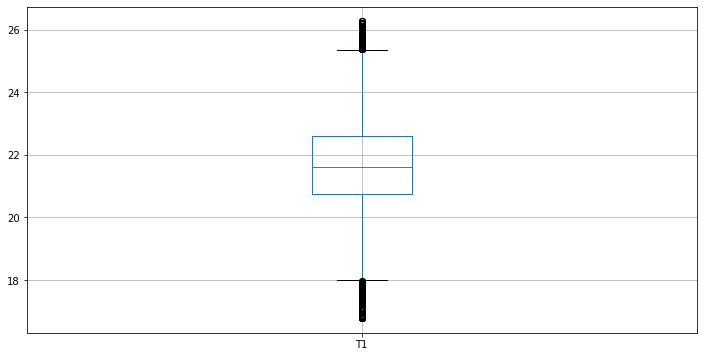

In [23]:
boxplot=df.boxplot(column=['T1'],figsize=(12,6))

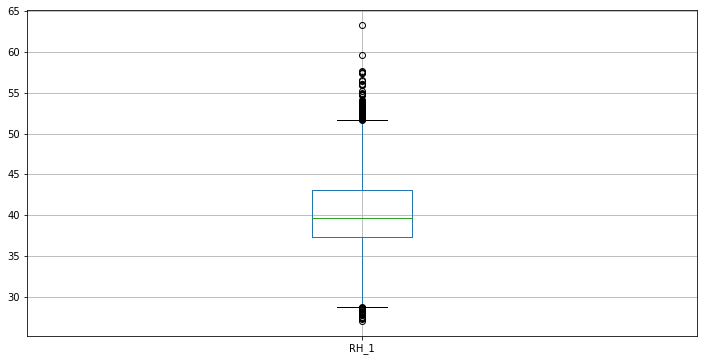

In [24]:
boxplot=df.boxplot(column=['RH_1'],figsize=(12,6))

In [25]:
q1=pd.DataFrame(df['Appliances']).quantile(0.25)[0]
q3=pd.DataFrame(df['Appliances']).quantile(0.75)[0]
IQR=q3-q1
IQR

50.0

In [26]:
data_low= q1-(1.5*IQR)
data_low

-25.0

In [27]:
data_high= q3+ (1.5*IQR)
data_high

175.0

In [28]:
df['Appliances'][(df['Appliances']< data_low) | (df['Appliances']> data_high)]

10       230
11       580
12       430
13       250
21       190
        ... 
19725    220
19726    180
19732    270
19733    420
19734    430
Name: Appliances, Length: 2138, dtype: int64

In [29]:
df = df.drop(df[(df.Appliances>790)|(df.Appliances<0)].index)


{'boxes': [<matplotlib.patches.PathPatch at 0x7fe01a4b5c90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe01b575290>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe01b5602d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe01b575d10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe01b432890>,
  <matplotlib.lines.Line2D at 0x7fe01b679a90>]}

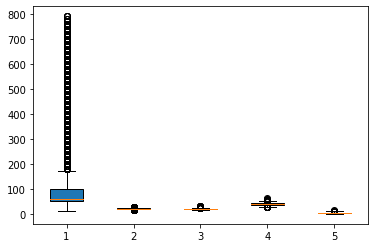

In [30]:
plt.boxplot([df.Appliances,df.T1,df.T2,df.RH_1,df.Windspeed],patch_artist=True)

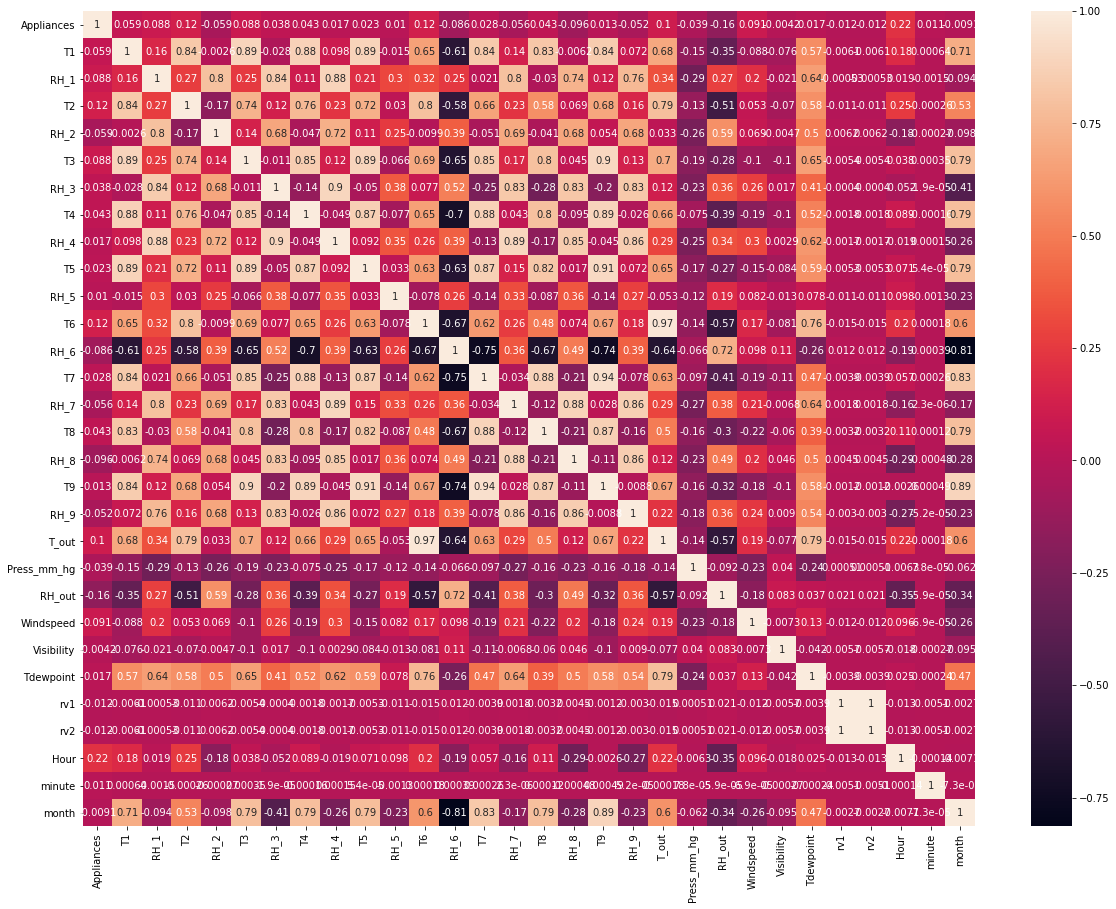

In [31]:
import seaborn as sn
plt.subplots(figsize=(20,15))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [32]:
df.drop(['T6','T9','rv2','rv1','Visibility'],axis=1,inplace=True)

In [33]:
# temp=df
# temp=temp.set_index('date')


In [34]:
df['weekday']=df['date'].dt.weekday
df['week']=df['date'].dt.week
df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,date,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,RH_6,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Hour,minute,month,weekday,week
0,2016-01-11 17:00:00,60,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.200000,84.256667,17.200000,41.626667,18.2,48.900000,45.53,6.600000,733.500000,92.000000,7.000000,5.300000,17,0,1,0,2
1,2016-01-11 17:10:00,60,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.200000,84.063333,17.200000,41.560000,18.2,48.863333,45.56,6.483333,733.600000,92.000000,6.666667,5.200000,17,10,1,0,2
2,2016-01-11 17:20:00,50,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.090000,83.156667,17.200000,41.433333,18.2,48.730000,45.50,6.366667,733.700000,92.000000,6.333333,5.100000,17,20,1,0,2
3,2016-01-11 17:30:00,50,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.090000,83.423333,17.133333,41.290000,18.1,48.590000,45.40,6.250000,733.800000,92.000000,6.000000,5.000000,17,30,1,0,2
4,2016-01-11 17:40:00,60,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.090000,84.893333,17.200000,41.230000,18.1,48.590000,45.40,6.133333,733.900000,92.000000,5.666667,4.900000,17,40,1,0,2
5,2016-01-11 17:50:00,50,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,55.030000,85.766667,17.133333,41.260000,18.1,48.590000,45.29,6.016667,734.000000,92.000000,5.333333,4.800000,17,50,1,0,2
6,2016-01-11 18:00:00,60,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,17.100000,54.966667,86.090000,17.133333,41.200000,18.1,48.590000,45.29,5.900000,734.100000,92.000000,5.000000,4.700000,18,0,1,0,2
7,2016-01-11 18:10:00,60,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,17.100000,54.900000,86.423333,17.100000,41.200000,18.1,48.590000,45.29,5.916667,734.166667,91.833333,5.166667,4.683333,18,10,1,0,2
8,2016-01-11 18:20:00,60,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,17.166667,55.000000,87.226667,17.166667,41.400000,18.1,48.590000,45.29,5.933333,734.233333,91.666667,5.333333,4.666667,18,20,1,0,2
9,2016-01-11 18:30:00,70,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,46.096667,17.100000,55.000000,87.626667,17.200000,41.500000,18.1,48.590000,45.29,5.950000,734.300000,91.500000,5.500000,4.650000,18,30,1,0,2


In [35]:
import plotly.graph_objs as go
from plotly.offline import  iplot
consumption_data = go.Scatter( x= df.date  ,  mode = "lines", y = df.Appliances)
layout = go.Layout(title = 'Appliance energy consumption measurement' , xaxis=dict(title='date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[consumption_data],layout=layout)

iplot(fig)

In [36]:
def daily_consumption(x,df=df):
    return df.groupby('weekday')[x].sum()

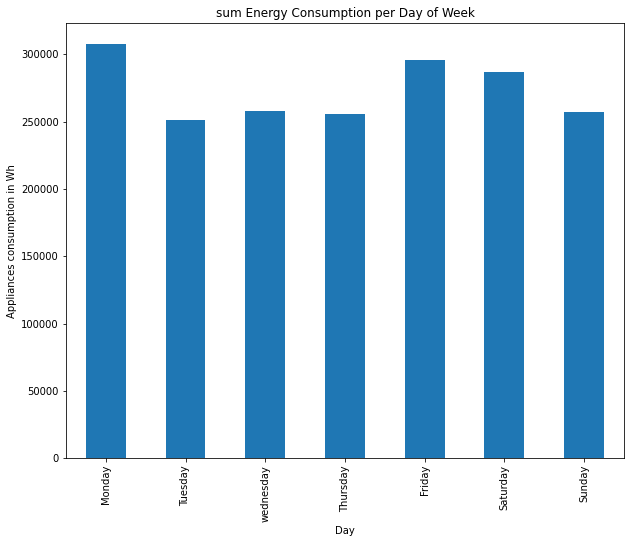

In [37]:
#daily consumption
daily_consumption('Appliances').plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0, 7, 1)) 
labels = "Monday Tuesday wednesday Thursday Friday Saturday Sunday".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('sum Energy Consumption per Day of Week')
plt.xticks(ticks, labels);

In [38]:
def hourly_consumption(x,df=df):
  return df.groupby('Hour')[x].sum()


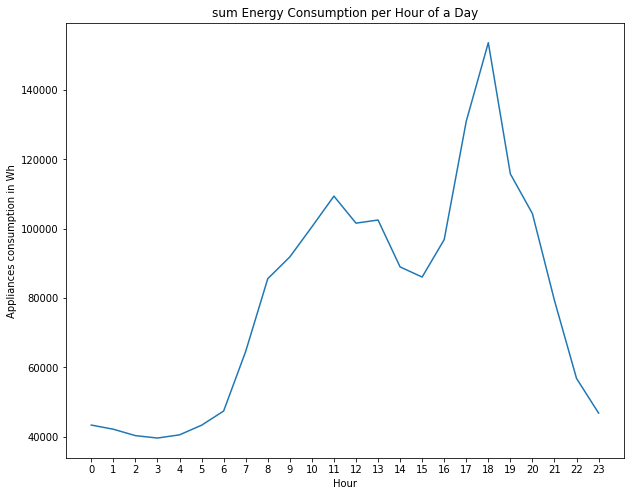

In [39]:
#Hourly consumption
hourly_consumption('Appliances').plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('sum Energy Consumption per Hour of a Day')

plt.xticks(ticks);

In [40]:
def monthly_consumption(x,df=df):
  return df.groupby('month')[x].sum()

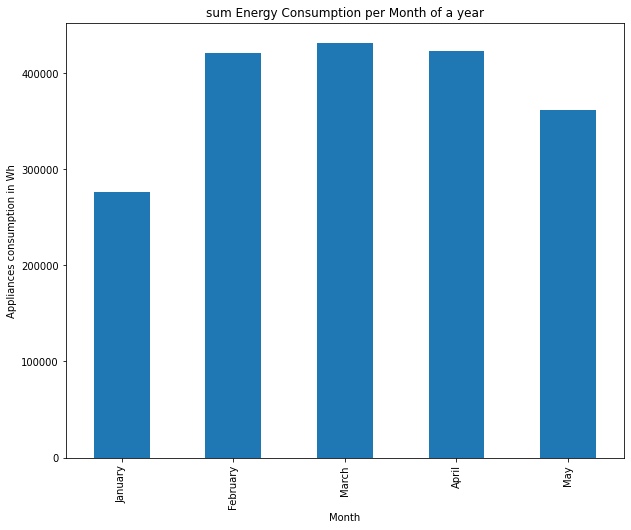

In [41]:
#monthly consumption
monthly_consumption('Appliances').plot(kind='bar',figsize=(10,8))
plt.xlabel('Month')
plt.ylabel('Appliances consumption in Wh')
labels = "January February March April May".split()
ticks = list(range(0, 5, 1))
plt.title('sum Energy Consumption per Month of a year')

plt.xticks(ticks,labels);

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19718 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19718 non-null  datetime64[ns]
 1   Appliances   19718 non-null  int64         
 2   T1           19718 non-null  float64       
 3   RH_1         19718 non-null  float64       
 4   T2           19718 non-null  float64       
 5   RH_2         19718 non-null  float64       
 6   T3           19718 non-null  float64       
 7   RH_3         19718 non-null  float64       
 8   T4           19718 non-null  float64       
 9   RH_4         19718 non-null  float64       
 10  T5           19718 non-null  float64       
 11  RH_5         19718 non-null  float64       
 12  RH_6         19718 non-null  float64       
 13  T7           19718 non-null  float64       
 14  RH_7         19718 non-null  float64       
 15  T8           19718 non-null  float64       
 16  RH_8

In [43]:
df['log_appliances'] = np.log(df.Appliances) 

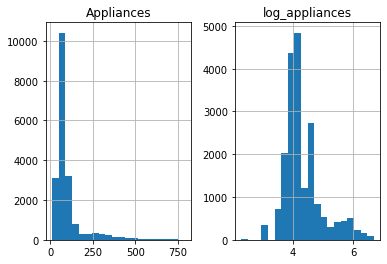

In [44]:
appliance = ["Appliances","log_appliances"]
appliance=df[appliance]
appliance.hist(bins = 20 ) ;

In [45]:
sum_data = pd.DataFrame()
for index_list,group in df.groupby(by=['date','Hour','weekday','week','month']):
  d = dict()
  d['date']=index_list[0]
  d['Hour']=index_list[1]
  d['weekday']=index_list[2]
  d['week'] = index_list[3]
  d['month'] = index_list[4]
  d['T1']=group['T1'].mean()
  d['T2']=group['T2'].mean()
  d['T3']=group['T3'].mean()
  d['T4']=group['T4'].mean()
  d['T5']=group['T5'].mean()
  d['T7']=group['T7'].mean()
  d['T8']=group['T8'].mean()
  d['T_out']=group['T_out'].mean()
  d['RH_1']=group['RH_1'].mean()
  d['RH_2']=group['RH_2'].mean()
  d['RH_3']=group['RH_3'].mean()
  d['RH_4']=group['RH_4'].mean()
  d['RH_5']=group['RH_5'].mean()
  d['RH_6']=group['RH_6'].mean()
  d['RH_7']=group['RH_7'].mean()
  d['RH_8']=group['RH_8'].mean()
  d['RH_9']=group['RH_9'].mean()
  d['RH_out']=group['RH_out'].mean()
  d['Press_mm_hg']=group['Press_mm_hg'].mean()
  d['Windspeed']=group['Windspeed'].mean()
  d['Tdewpoint']=group['Tdewpoint'].mean()
  d['log_appliances'] = group['log_appliances'].mean()
  sum_data = sum_data.append(d, ignore_index=True)

In [46]:
sum_data.drop(columns=['date'],inplace=True)

In [47]:
sum_data.drop(columns=['Hour','week','weekday'],inplace=True)

In [48]:
sum_data

,Press_mm_hg,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,RH_out,T1,T2,T3,T4,T5,T7,T8,T_out,Tdewpoint,Windspeed,log_appliances,month
0,733.5,47.596667,44.790000,44.730000,45.566667,55.200000,84.256667,41.626667,48.900000,45.5300,92.000000,19.890000,19.200000,19.790000,19.000000,17.166667,17.200000,18.2000,6.600000,5.300000,7.000000,4.094345,1.0
1,733.6,46.693333,44.722500,44.790000,45.992500,55.200000,84.063333,41.560000,48.863333,45.5600,92.000000,19.890000,19.200000,19.790000,19.000000,17.166667,17.200000,18.2000,6.483333,5.200000,6.666667,4.094345,1.0
2,733.7,46.300000,44.626667,44.933333,45.890000,55.090000,83.156667,41.433333,48.730000,45.5000,92.000000,19.890000,19.200000,19.790000,18.926667,17.166667,17.200000,18.2000,6.366667,5.100000,6.333333,3.912023,1.0
3,733.8,46.066667,44.590000,45.000000,45.723333,55.090000,83.423333,41.290000,48.590000,45.4000,92.000000,19.890000,19.200000,19.790000,18.890000,17.166667,17.133333,18.1000,6.250000,5.000000,6.000000,3.912023,1.0
4,733.9,46.333333,44.530000,45.000000,45.530000,55.090000,84.893333,41.230000,48.590000,45.4000,92.000000,19.890000,19.200000,19.790000,18.890000,17.200000,17.200000,18.1000,6.133333,4.900000,5.666667,4.094345,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19713,755.2,46.560000,42.025714,41.163333,45.590000,52.400000,1.000000,44.500000,50.074000,46.7900,55.666667,25.566667,25.890000,27.200000,24.700000,23.200000,24.500000,24.7000,22.733333,13.333333,3.333333,4.605170,5.0
19714,755.2,46.500000,42.080000,41.223333,45.590000,52.326667,1.000000,44.414286,49.790000,46.7900,56.000000,25.500000,25.754000,27.133333,24.700000,23.230000,24.557143,24.7000,22.600000,13.300000,3.500000,4.499810,5.0
19715,755.2,46.596667,42.768571,41.690000,45.730000,52.266667,1.000000,44.400000,49.660000,46.7900,56.333333,25.500000,25.628571,27.050000,24.700000,23.230000,24.540000,24.7000,22.466667,13.266667,3.666667,5.598422,5.0
19716,755.2,46.990000,43.036000,41.290000,45.790000,52.200000,1.000000,44.295714,49.518750,46.8175,56.666667,25.500000,25.414000,26.890000,24.700000,23.200000,24.500000,24.6625,22.333333,13.233333,3.833333,6.040255,5.0


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X=sum_data.drop(['log_appliances'],axis=1)
y=sum_data['log_appliances']

In [51]:
print('the shape of X is {}'.format(X.shape))

the shape of X is (19718, 22)


In [52]:
print('the shape of y is {}'.format(y.shape))

the shape of y is (19718,)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [104]:
y_test.shape

(5916,)

In [54]:
from sklearn.preprocessing import StandardScaler
normal_data=StandardScaler()

normal_data.fit(X_train)
X_train=normal_data.transform(X_train)
X_test=normal_data.transform(X_test)



In [55]:
# MSE = []
# r2 = []
# RMSE = []

SVM-based regression model

In [77]:
from sklearn import svm
import time
start=time.time()
svr_model= svm.SVR(kernel='rbf')
svr_model.fit(X_train,y_train)
end=time.time()
print("--- %s SVM trianing time ---" % (end-start))
predict_value_svr= svr_model.predict(X_test)

--- 14.513736009597778 SVM trianing time ---


In [57]:
#evaluate model
MAPE= np.mean(np.abs((y_test - predict_value_svr) / y_test)) * 100
print('MAPE value is :{}'.format(MAPE))

MAPE value is :6.778240062046136


In [58]:
#MAE 
from sklearn.metrics import mean_absolute_error
MAE= mean_absolute_error(y_test,predict_value_svr)
print('MAE value is :{}'.format(MAE))

MAE value is :0.30460027875613627


In [59]:
#accuracy
accuracy=100 - MAPE
print('Accuracy: {}'.format(accuracy))

Accuracy: 93.22175993795386


In [60]:
# RMSE
from sklearn.metrics import mean_squared_error
RMSE= np.sqrt(mean_squared_error(y_test,predict_value_svr))
print('RMSE value is :{}'.format(RMSE))

RMSE value is :0.4762688549439433


In [61]:
#NRMSE
from sklearn.metrics import mean_squared_error
NRMSE= np.sqrt(mean_squared_error(y_test,predict_value_svr))/np.mean(y_test)
print('NRMSE value is :{}'.format(NRMSE))

NRMSE value is :0.11079620851580473


In [62]:
#evaluate model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

def evaluate(model, X_test, y_test):
  prediction= model.predict(X_test)
  MAPE= np.mean(np.abs((y_test - prediction) / y_test)) * 100
  #MAE 
  MAE= mean_absolute_error(y_test,prediction)
  #accuracy
  accuracy=100 - MAPE
  # RMSE
  RMSE= np.sqrt(mean_squared_error(y_test,prediction))
  #NRMSE
  NRMSE= np.sqrt(mean_squared_error(y_test,prediction))/np.mean(y_test)
  print('MAPE value is :{}'.format(MAPE))
  print('MAE value is :{}'.format(MAE))
  print('Accuracy: {}'.format(accuracy))
  print('RMSE value is :{}'.format(RMSE))
  print('NRMSE value is :{}'.format(NRMSE))

In [63]:
evaluate(svr_model,X_test,y_test)

MAPE value is :6.778240062046136
MAE value is :0.30460027875613627
Accuracy: 93.22175993795386
RMSE value is :0.4762688549439433
NRMSE value is :0.11079620851580473


**KNN_regression model**

In [86]:
import time
start=time.time()
model = neighbors.KNeighborsRegressor(n_neighbors = 49,metric='euclidean')
model.fit(X_train, y_train)
end=time.time()
print(" %s is running knn trianing time" % (end-start)) 

 0.04228544235229492 is running knn trianing time


In [84]:
from sklearn import neighbors

RMSE_vlaue = [] 

for K in range(49):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K,metric='euclidean')
    model.fit(X_train, y_train) 
    pred=model.predict(X_test) 
    error = np.sqrt(mean_squared_error(y_test,pred)) 
    RMSE_vlaue.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)


 0.04248166084289551 is running knn trianing time
RMSE value for k=  1 is: 0.5116438979892997
RMSE value for k=  2 is: 0.5116438979892997
RMSE value for k=  3 is: 0.5116438979892997
RMSE value for k=  4 is: 0.5116438979892997
RMSE value for k=  5 is: 0.5116438979892997
RMSE value for k=  6 is: 0.5116438979892997
RMSE value for k=  7 is: 0.5116438979892997
RMSE value for k=  8 is: 0.5116438979892997
RMSE value for k=  9 is: 0.5116438979892997
RMSE value for k=  10 is: 0.5116438979892997
RMSE value for k=  11 is: 0.5116438979892997
RMSE value for k=  12 is: 0.5116438979892997
RMSE value for k=  13 is: 0.5116438979892997
RMSE value for k=  14 is: 0.5116438979892997
RMSE value for k=  15 is: 0.5116438979892997
RMSE value for k=  16 is: 0.5116438979892997
RMSE value for k=  17 is: 0.5116438979892997
RMSE value for k=  18 is: 0.5116438979892997
RMSE value for k=  19 is: 0.5116438979892997
RMSE value for k=  20 is: 0.5116438979892997
RMSE value for k=  21 is: 0.5116438979892997
RMSE value for

In [65]:
RMSE_KNN=min(RMSE_vlaue)
print('RMSE_KNN is :{}'.format(RMSE_KNN))

RMSE_KNN is :0.3599435416539683


In [66]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
NRMSE_vlaue = [] 
for K in range(49):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K,metric='euclidean')
    model.fit(X_train, y_train) 
    pred=model.predict(X_test) 
    NRMSE= np.sqrt(mean_squared_error(y_test,pred))/np.mean(y_test)
    NRMSE_vlaue.append(NRMSE) 
    print('NRMSE value for k= ' , K , 'is:', NRMSE)

NRMSE value for k=  1 is: 0.09451533111562957
NRMSE value for k=  2 is: 0.08373501496272358
NRMSE value for k=  3 is: 0.08638382642340683
NRMSE value for k=  4 is: 0.08989211600163745
NRMSE value for k=  5 is: 0.09218273658402618
NRMSE value for k=  6 is: 0.09452484496233858
NRMSE value for k=  7 is: 0.09655570306763764
NRMSE value for k=  8 is: 0.09802291665351115
NRMSE value for k=  9 is: 0.09941707219704833
NRMSE value for k=  10 is: 0.10050283041666941
NRMSE value for k=  11 is: 0.10132931328338426
NRMSE value for k=  12 is: 0.102193502296916
NRMSE value for k=  13 is: 0.1031507388932076
NRMSE value for k=  14 is: 0.10394103329095908
NRMSE value for k=  15 is: 0.10454043659861838
NRMSE value for k=  16 is: 0.10545965721697202
NRMSE value for k=  17 is: 0.10622422706328295
NRMSE value for k=  18 is: 0.10696327766915016
NRMSE value for k=  19 is: 0.10752336543951288
NRMSE value for k=  20 is: 0.10805168013351604
NRMSE value for k=  21 is: 0.10856049618823484
NRMSE value for k=  22 is

In [67]:
NRMSE_KNN=min(NRMSE_vlaue)
print('NRMSE_KNN is :{}'.format(NRMSE_KNN))

NRMSE_KNN is :0.08373501496272358


In [68]:
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error

MAE_vlaue = [] 
for K in range(49):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K,metric='euclidean')
    model.fit(X_train, y_train) 
    pred=model.predict(X_test) 
    MAE= mean_absolute_error(y_test,pred)
    MAE_vlaue.append(MAE)
    print('MAE value for k= ' , K , 'is:', MAE)

MAE value for k=  1 is: 0.24345039399065993
MAE value for k=  2 is: 0.2272816412355608
MAE value for k=  3 is: 0.23992674734948316
MAE value for k=  4 is: 0.25190132868380494
MAE value for k=  5 is: 0.2617993715446766
MAE value for k=  6 is: 0.27090461814677014
MAE value for k=  7 is: 0.2772644117507592
MAE value for k=  8 is: 0.28243703656401375
MAE value for k=  9 is: 0.2866032121875023
MAE value for k=  10 is: 0.2901581222402378
MAE value for k=  11 is: 0.29289482661955196
MAE value for k=  12 is: 0.2959399784822555
MAE value for k=  13 is: 0.2988019172493635
MAE value for k=  14 is: 0.30093800853750985
MAE value for k=  15 is: 0.3027320276640969
MAE value for k=  16 is: 0.3048595666503699
MAE value for k=  17 is: 0.3063194162786082
MAE value for k=  18 is: 0.30814534481173145
MAE value for k=  19 is: 0.3098978496684385
MAE value for k=  20 is: 0.3113467629072013
MAE value for k=  21 is: 0.3128772518138858
MAE value for k=  22 is: 0.31396757105125034
MAE value for k=  23 is: 0.31570

In [69]:
MAE_KNN=min(MAE_vlaue)
print('MAE_KNN is :{}'.format(MAE_KNN))

MAE_KNN is :0.2272816412355608


In [70]:
from sklearn import neighbors
MAPE_value = [] 
for K in range(49):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K,metric='euclidean')
    model.fit(X_train, y_train) 
    pred=model.predict(X_test) 
    MAPE= np.mean(np.abs((y_test - pred) / y_test)) * 100
    MAPE_value.append(MAPE)
    print('MAPE value for k= ' , K , 'is:', MAPE)

MAPE value for k=  1 is: 5.569902239299006
MAPE value for k=  2 is: 5.208140641268881
MAPE value for k=  3 is: 5.46755289676182
MAPE value for k=  4 is: 5.733560328902067
MAPE value for k=  5 is: 5.954708191937078
MAPE value for k=  6 is: 6.160709283518746
MAPE value for k=  7 is: 6.298353818885443
MAPE value for k=  8 is: 6.408362320274433
MAPE value for k=  9 is: 6.495254505436335
MAPE value for k=  10 is: 6.569850910109976
MAPE value for k=  11 is: 6.623253797982648
MAPE value for k=  12 is: 6.688864818627582
MAPE value for k=  13 is: 6.748644271838665
MAPE value for k=  14 is: 6.788479910934816
MAPE value for k=  15 is: 6.823581907339969
MAPE value for k=  16 is: 6.8667863067248645
MAPE value for k=  17 is: 6.896711396545263
MAPE value for k=  18 is: 6.93494825808523
MAPE value for k=  19 is: 6.972171004212406
MAPE value for k=  20 is: 7.001154910163142
MAPE value for k=  21 is: 7.032647818643158
MAPE value for k=  22 is: 7.052300139883506
MAPE value for k=  23 is: 7.08684902613479

In [71]:
MAPE_KNN=min(MAPE_value)
print('MAPE_KNN is :{}'.format(MAPE_KNN))

MAPE_KNN is :5.208140641268881


In [72]:
accuracy=100 - MAPE_KNN
print('Accuracy: {}'.format(accuracy))

Accuracy: 94.79185935873112


**ANN-MLP model**

In [73]:
from sklearn.neural_network import MLPRegressor
import time
start_time = time.time()
reg = MLPRegressor(solver='adam', alpha=1e-5, hidden_layer_sizes=(200,), random_state=0, activation='relu')
reg.fit(X_train, y_train) 
end_time=time.time()
ANN_train_time=end_time-start_time
predictions_test = reg.predict(X_test)
print("--- %s seconds ---" % (ANN_train_time))

--- 20.221948623657227 seconds ---


In [74]:
print(predictions_test)

[4.60264054 3.84133277 4.01293601 ... 5.52758646 4.05932164 4.8231028 ]


In [75]:
evaluate(reg,X_test,y_test)

MAPE value is :6.993458286924069
MAE value is :0.3083044388044486
Accuracy: 93.00654171307593
RMSE value is :0.4504651180115523
NRMSE value is :0.10479338849519965


In [111]:
df=pd.DataFrame({'predicted_energy_ANN':predictions_test,'predicted_energy_SVR':predict_value_svr,'predicted_energy_KNN':pred,'actual_energy':y_test})
df

,predicted_energy_ANN,predicted_energy_SVR,predicted_energy_KNN,actual_energy
11524,4.602641,4.574362,4.455883,4.787492
10711,3.841333,3.997364,3.934138,3.912023
257,4.012936,4.087994,4.204948,3.912023
10965,4.320285,4.341642,4.273221,4.499810
7960,3.936911,3.927423,4.032462,3.912023
...,...,...,...,...
6377,3.952913,3.935790,3.892922,3.401197
10304,4.651455,4.165776,4.109367,3.912023
12662,5.527586,5.084801,5.180985,5.703782
466,4.059322,3.924012,4.119257,3.912023


In [119]:
df.describe()

,predicted_energy_ANN,predicted_energy_SVR,predicted_energy_KNN,actual_energy
count,5916.000000,5916.000000,5916.000000,5916.000000
mean,4.277658,4.240989,4.259990,4.298602
std,0.453342,0.371239,0.344809,0.639983
min,3.422497,3.538827,3.499231,2.302585
25%,3.927925,3.979910,4.012847,3.912023
50%,4.184867,4.149307,4.198587,4.094345
75%,4.585080,4.476801,4.484856,4.605170
max,6.094432,5.957893,5.637370,6.672033


In [ ]:
df['predicted_energy_ANN'].plot(kind='kde',figsize=(20,8))
# ticks = list(range(0, 7, 1)) 
# labels = "Monday Tuesday wednesday Thursday Friday Saturday Sunday".split()
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
plt.title('sum Energy Consumption per Day of Week')
# plt.xticks(ticks, labels);